In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/ratings.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Display basic information about the dataset
print(df.info())

# Display summary statistics of the dataset
print(df.describe())

# Check for missing values
print(df.isnull().sum())


          Game Name      Developer              Genre  Rating
0  Candy Crush Saga           King             Puzzle     4.6
1    Clash of Clans      Supercell           Strategy     4.5
2          Among Us     InnerSloth              Party     4.4
3        Pokémon GO        Niantic  Augmented Reality     4.3
4       PUBG Mobile  Tencent Games      Battle Royale     4.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Game Name  101 non-null    object 
 1   Developer  101 non-null    object 
 2   Genre      101 non-null    object 
 3   Rating     101 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
           Rating
count  101.000000
mean     4.398020
std      0.175488
min      4.100000
25%      4.300000
50%      4.400000
75%      4.500000
max      4.900000
Game Name    0
Developer    0
Genre        0
Rating       0
dtype

In [2]:

# Check for duplicates and remove them
df = df.drop_duplicates()

# Summary after cleaning
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Game Name  101 non-null    object 
 1   Developer  101 non-null    object 
 2   Genre      101 non-null    object 
 3   Rating     101 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


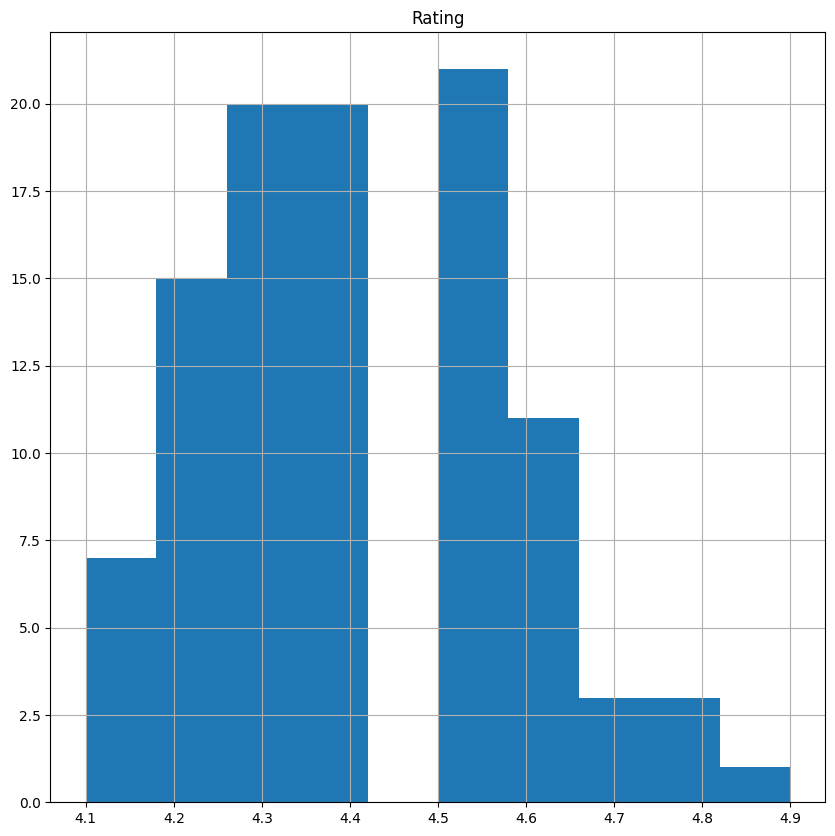

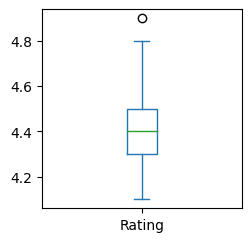

In [3]:
# Histograms for each numeric column
df.hist(figsize=(10, 10))
plt.show()

# Box plots for each numeric column
df.plot(kind='box', subplots=True, layout=(5,5), figsize=(15,15), sharex=False, sharey=False)
plt.show()


          Game Name      Developer              Genre  Rating
0  Candy Crush Saga           King             Puzzle     4.6
1    Clash of Clans      Supercell           Strategy     4.5
2          Among Us     InnerSloth              Party     4.4
3        Pokémon GO        Niantic  Augmented Reality     4.3
4       PUBG Mobile  Tencent Games      Battle Royale     4.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Game Name  101 non-null    object 
 1   Developer  101 non-null    object 
 2   Genre      101 non-null    object 
 3   Rating     101 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
Non-numeric columns: Index(['Game Name', 'Developer', 'Genre'], dtype='object')
Game Name      int64
Developer      int64
Genre          int64
Rating       float64
dtype: object


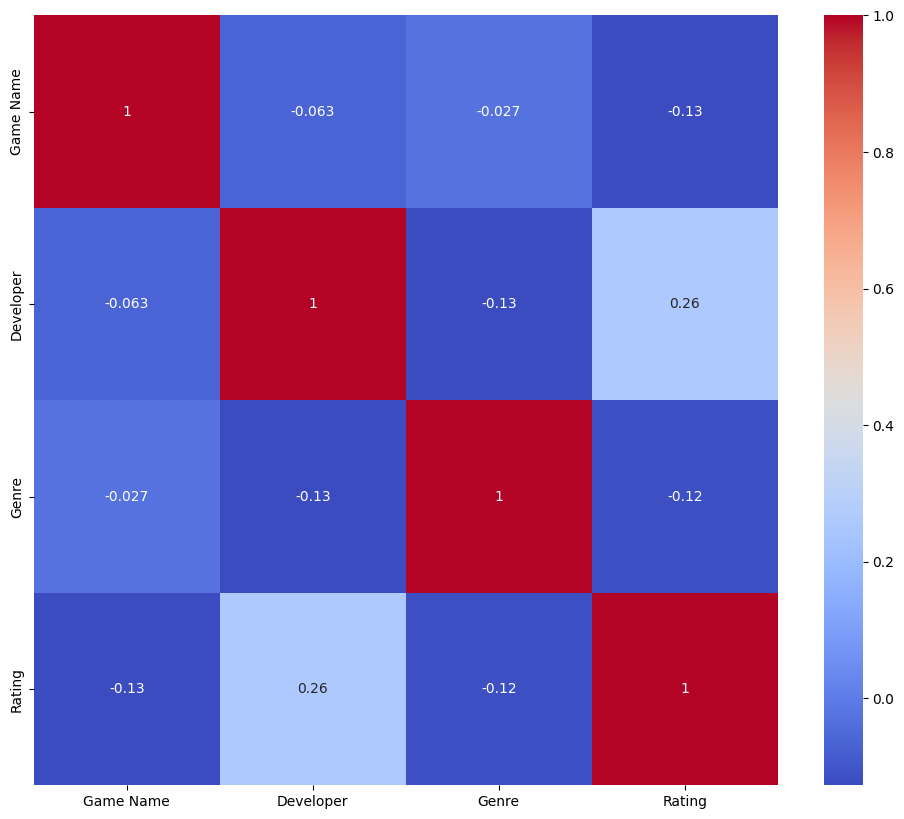

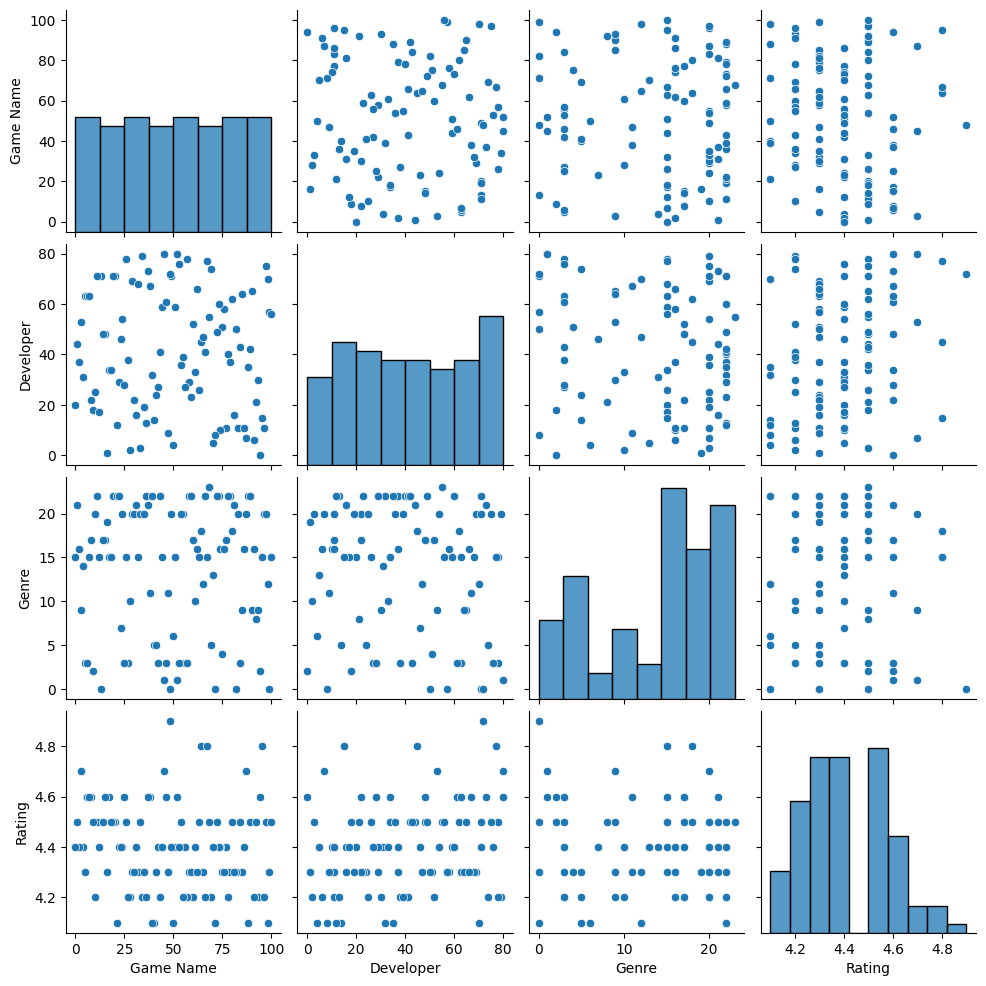

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset


# Display the first few rows of the dataset
print(df.head())

# Display basic information about the dataset
print(df.info())

# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Option 1: Label encode non-numeric columns (if they are categorical)
label_encoders = {}
for column in non_numeric_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Option 2: Drop non-numeric columns if they are not needed for correlation
# df = df.drop(columns=non_numeric_columns)

# Check the updated data types
print(df.dtypes)

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Scatter plots (pairplot)
sns.pairplot(df)
plt.show()


In [5]:
# prompt: show all the columns name

print(df.columns.values)


['Game Name' 'Developer' 'Genre' 'Rating']


In [4]:
print(df.describe())

           Rating
count  101.000000
mean     4.398020
std      0.175488
min      4.100000
25%      4.300000
50%      4.400000
75%      4.500000
max      4.900000


Non-numeric columns: Index([], dtype='object')


<ipython-input-7-6b0773268aa5>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=suicidal_ideation_col, palette='viridis')


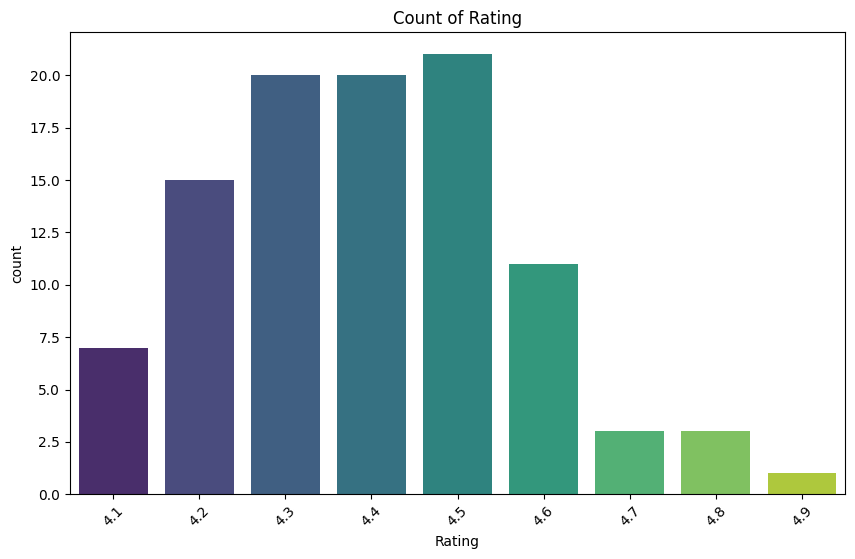

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# Handle missing values (example: filling with the mode for categorical columns)
for column in non_numeric_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Identify the suicidal ideation column
suicidal_ideation_col = 'Rating'  # Change this to the actual column name if different

# Plotting the count of suicidal ideation occurrences
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=suicidal_ideation_col, palette='viridis')
plt.title(f'Count of {suicidal_ideation_col}')
plt.xticks(rotation=45)
plt.show()

# Plotting relationships with other categorical columns
for column in non_numeric_columns:
    if column != suicidal_ideation_col:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=suicidal_ideation_col, hue=column, palette='viridis')
        plt.title(f'Relationship between {suicidal_ideation_col} and {column}')
        plt.xticks(rotation=45)
        plt.show()


   Game Name  Developer  Genre  Rating
0         17         34     15     4.6
1         20         71     22     4.5
2          4         31     14     4.4
3         75         51      4     4.3
4         69         74      5     4.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Game Name  101 non-null    int64  
 1   Developer  101 non-null    int64  
 2   Genre      101 non-null    int64  
 3   Rating     101 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 3.3 KB
None


<ipython-input-13-1c07c384009d>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Genre', y='Rating', palette='viridis', ci=None)
<ipython-input-13-1c07c384009d>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Genre', y='Rating', palette='viridis', ci=None)


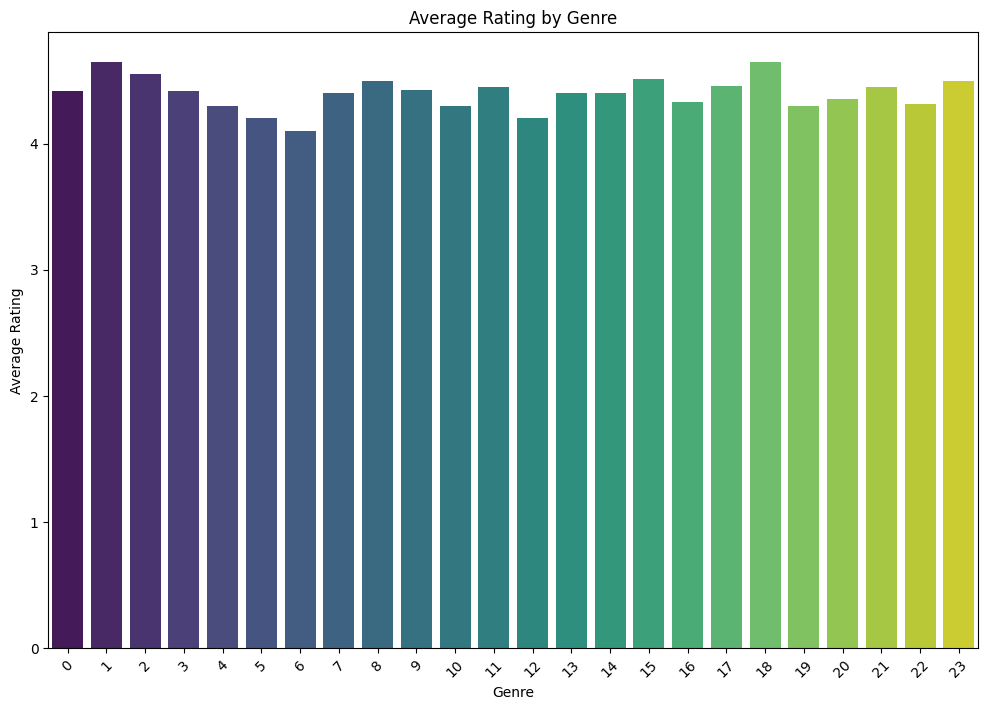

In [13]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Display the first few rows of the dataset
print(df.head())

# Display basic information about the dataset
print(df.info())

# Handle missing values (example: filling with the mode for categorical columns)
df['Genre'].fillna(df['Genre'].mode()[0], inplace=True)
df['Rating'].fillna(df['Rating'].mode()[0], inplace=True)

# Plotting the relationship between 'Genre' and 'Rating' using a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Genre', y='Rating', palette='viridis', ci=None)
plt.title('Average Rating by Genre')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()


          Game Name      Developer              Genre  Rating
0  Candy Crush Saga           King             Puzzle     4.6
1    Clash of Clans      Supercell           Strategy     4.5
2          Among Us     InnerSloth              Party     4.4
3        Pokémon GO        Niantic  Augmented Reality     4.3
4       PUBG Mobile  Tencent Games      Battle Royale     4.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Game Name  101 non-null    object 
 1   Developer  101 non-null    object 
 2   Genre      101 non-null    object 
 3   Rating     101 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


<ipython-input-14-80a9c480e87a>:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Genre', y='Rating', palette='viridis', ci=None)
<ipython-input-14-80a9c480e87a>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Genre', y='Rating', palette='viridis', ci=None)


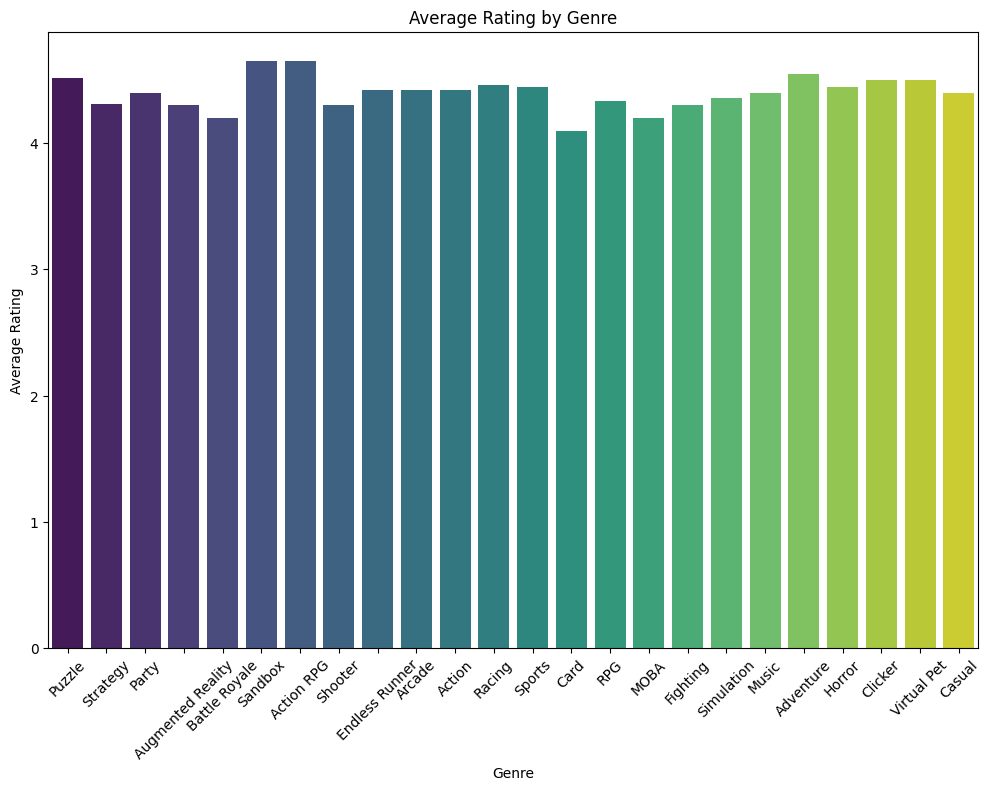

In [14]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your data in a CSV file, load it into a DataFrame
# Replace 'your_data.csv' with the actual file name or path
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ratings.csv')

# Display the first few rows of the dataset
print(df.head())

# Display basic information about the dataset
print(df.info())

# Handle missing values (example: filling with the mode for categorical columns)
df['Genre'].fillna(df['Genre'].mode()[0], inplace=True)
df['Rating'].fillna(df['Rating'].mode()[0], inplace=True)

# Plotting the relationship between 'Genre' and 'Rating' using a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Genre', y='Rating', palette='viridis', ci=None)
plt.title('Average Rating by Genre')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()
